# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras import models as ml
from keras import layers as l

from sklearn import preprocessing as pp
from sklearn import metrics as m
from sklearn import model_selection as ms

from scikitplot import metrics as mt

## 0.1 Importing Data

In [2]:
df_raw = pd.read_csv('D:\\My Drive\\Pessoal\\projetos\\airbnb_first_booking_predict\\airbnb_first_booking_predict\\data\\raw\\train_users_2.csv')
# sessions = pd.read_csv('D:\\My Drive\\Pessoal\\projetos\\airbnb_predict_first_booking\\airbnb_predict_first_booking\\data\\raw\\sessions.csv')

## 0.2 Helper Functions

# 1.0 Data Description

In [3]:
df1 = df_raw.copy()

## 1.1 Data Dimension

In [4]:
print(f'Há: {df1.shape[0]} linhas no total')
print(f'Há: {df1.shape[1]} colunas no total')

Há: 213451 linhas no total
Há: 16 colunas no total


## 1.2 Datatypes

In [5]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## 1.3 Check Na

In [6]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## 1.4 Filout Na

In [7]:
# remove missing value completly
temp = df1.shape[0]
df1.dropna(inplace=True)
print(f'Porcentagem da base removida: {round((temp - df1.shape[0]) * 100/ temp, 2)}%')

Porcentagem da base removida: 68.06%


## 1.5 Changing datatype

In [8]:
# date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])
# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')
# date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])
# age
df1['age'] = df1['age'].astype(int)

## 1.6 Check Balanced Data

In [9]:
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

## 1.7 Descriptive Statistic

# 2.0 Feature Engineering

In [10]:
df2 = df1.copy()

# 3.0 Exploratory Data Analysis

In [11]:
df3 = df2.copy()

# 4.0 Data Filtering

In [12]:
df4 = df3.copy()

## 4.1 Filtering Rows

## 4.2 Columns Selection

# 5.0 Data Preparation

In [13]:
df5 = df4.copy()

## 5.1 Preprocessing

In [14]:
X = df5.drop(['id', 'country_destination'], axis=1)
y = df5['country_destination']
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=100)

## 5.2 Target

## 5.3 Features

### 5.3.1 Encodings

In [15]:
cat_attributes = df5.drop(['id', 'country_destination'], axis=1).select_dtypes(exclude=[int, float, 'datetime64[ns]']).columns.to_list()

temp = pd.get_dummies(df5[cat_attributes])

df5 = pd.concat([df5, temp], axis=1).drop(cat_attributes, axis=1)

# 6.0 Feature Selection

In [16]:
df6 = df5.copy()

In [17]:
cols_drop = 'date_account_created timestamp_first_active date_first_booking'.split()
df6.drop(cols_drop, axis=1, inplace=True)

# 7.0 Machine Learning Modeling

In [18]:
df7 = df6.copy()

## 7.1 Preprocessing

In [19]:
X = df7.drop(['id', 'country_destination'], axis=1)
y = df7['country_destination']
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=100)

## 7.2 Models

### 7.2.1 Neural Network MLP

In [20]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()

# model definition
nn_model = ml.Sequential()
nn_model.add(l.Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(l.Dense(11, activation='softmax'))

# model compile
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

# fiting model
nn_model.fit(X_train, y_train_nn, epochs=100)

# predicting
y_hat = nn_model.predict(X_test)

# formating
y_hat = ohe.inverse_transform(y_hat)
y_test = y_test.to_numpy()
y_hat = y_hat.reshape(1, -1)[0]

Epoch 1/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.3585 - accuracy: 0.7045
Epoch 2/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2888 - accuracy: 0.7073
Epoch 3/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2384 - accuracy: 0.7089
Epoch 4/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2131 - accuracy: 0.7092
Epoch 5/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1984 - accuracy: 0.7092
Epoch 6/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1748 - accuracy: 0.7092
Epoch 7/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1636 - accuracy: 0.7091
Epoch 8/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1482 - accuracy: 0.7093
Epoch 9/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1426 - accuracy: 0.7093
Epoch 10/100
1705/1705 [==============================] - 3s 2ms/step - l

1705/1705 [==============================] - 3s 2ms/step - loss: 1.0976 - accuracy: 0.7126
Epoch 80/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0969 - accuracy: 0.7124
Epoch 81/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0970 - accuracy: 0.7125
Epoch 82/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0964 - accuracy: 0.7125
Epoch 83/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0965 - accuracy: 0.7124
Epoch 84/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0962 - accuracy: 0.7126
Epoch 85/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0956 - accuracy: 0.7126
Epoch 86/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0958 - accuracy: 0.7127
Epoch 87/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0954 - accuracy: 0.7124
Epoch 88/100
1705/1705 [==============================] - 3s 2ms/step - loss:

# 8.0 Model Performance

## 8.1 Machine Learning Performance

Accuracy: 0.7008434176751008
Balanced Accuracy: 0.09144770862808614
Kappa Score : 0.0008709500852475127


D:\My Drive\Pessoal\environments\data_science\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Drive\Pessoal\environments\data_science\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Drive\Pessoal\environments\data_science\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        83
          CA       0.00      0.00      0.00       234
          DE       0.20      0.01      0.01       158
          ES       0.00      0.00      0.00       331
          FR       0.00      0.00      0.00       724
          GB       0.00      0.00      0.00       385
          IT       0.00      0.00      0.00       423
          NL       0.00      0.00      0.00       129
          PT       0.00      0.00      0.00        28
          US       0.70      1.00      0.82      9590
       other       0.17      0.00      0.01      1550

    accuracy                           0.70     13635
   macro avg       0.10      0.09      0.08     13635
weighted avg       0.52      0.70      0.58     13635



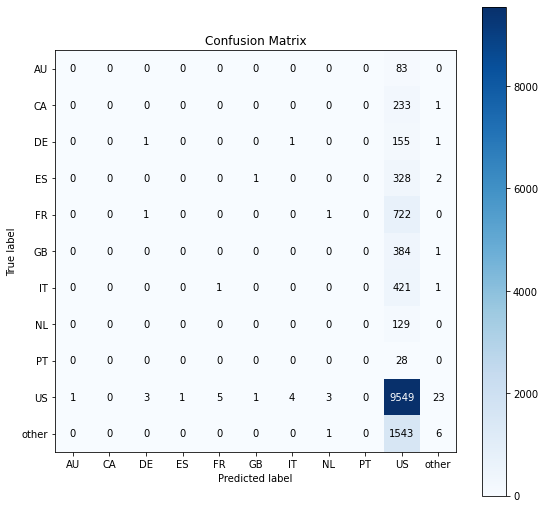

In [23]:
# metrics
acc = m.accuracy_score(y_test, y_hat)
balanced_acc = m.balanced_accuracy_score(y_test, y_hat)
kappa = m.cohen_kappa_score(y_test, y_hat)

print(f'Accuracy: {acc}')
print(f'Balanced Accuracy: {balanced_acc}')
print(f'Kappa Score : {kappa}')
print(f'{m.classification_report(y_test, y_hat)}')

mt.plot_confusion_matrix(y_test, y_hat, normalize=False, figsize=(9, 9));